In [4]:
import getpass
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

os.environ["LANGCHAIN_TRACING_V2"] = "true"

load_dotenv()
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")
if "LANGCHAIN_API_KEY" not in os.environ:
    os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("Enter your LangChain API key: ")


In [5]:
import random
from typing_extensions import TypedDict, Literal
from langgraph.graph import StateGraph, START
from langgraph.types import Command

# Define graph state
class State(TypedDict):
    foo: str

# Define the nodes

def node_a(state: State) -> Command[Literal["node_b", "node_c"]]:
    print("Called A")
    value = random.choice(["a", "b"])
    # this is a replacement for a conditional edge function
    if value == "a":
        goto = "node_b"
    else:
        goto = "node_c"

    # note how Command allows you to BOTH update the graph state AND route to the next node
    return Command(
        # this is the state update
        update={"foo": value},
        # this is a replacement for an edge
        goto=goto,
    )

def node_b(state: State):
    print("Called B")
    return {"foo": state["foo"] + "b"}

def node_c(state: State):
    print("Called C")
    return {"foo": state["foo"] + "c"}

In [6]:
builder = StateGraph(State)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(node_b)
builder.add_node(node_c)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()

Graph structure (Mermaid syntax):
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	node_a(node_a)
	node_b(node_b)
	node_c(node_c)
	__end__([<p>__end__</p>]):::last
	__start__ --> node_a;
	node_a -.-> node_b;
	node_a -.-> node_c;
	node_b --> __end__;
	node_c --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



Graph structure (Mermaid syntax):
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	node_a(node_a)
	node_b(node_b)
	node_c(node_c)
	__end__([<p>__end__</p>]):::last
	__start__ --> node_a;
	node_a -.-> node_b;
	node_a -.-> node_c;
	node_b --> __end__;
	node_c --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



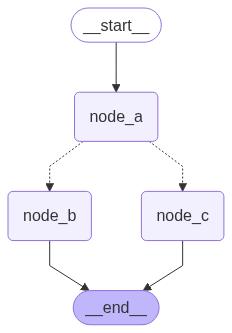

In [7]:
# Print the graph structure
print("Graph structure (Mermaid syntax):")
print(graph.get_graph().draw_mermaid())

# Also display as an image if possible
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display image: {e}")
    print("The mermaid syntax above shows the graph structure.")

In [8]:
# Demonstrate how Command works - run multiple times to see different paths
print("=== Demonstrating Command functionality ===")
print("Note: node_a randomly chooses between 'node_b' and 'node_c' using Command")
print()

for i in range(5):
    print(f"--- Run {i+1} ---")
    result = graph.invoke({"foo": "start"})
    print(f"Final state: {result}")
    print()

print("Key points about Command:")
print("1. Command allows a node to BOTH update state AND route to next node")
print("2. No explicit edges needed between nodes - Command handles routing")
print("3. node_a uses Command to randomly route to either node_b or node_c")
print("4. The 'update' parameter updates the state")
print("5. The 'goto' parameter specifies which node to execute next")

=== Demonstrating Command functionality ===
Note: node_a randomly chooses between 'node_b' and 'node_c' using Command

--- Run 1 ---
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 2 ---
Called A
Called C
Final state: {'foo': 'bc'}

--- Run 3 ---
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 4 ---
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 5 ---
Called A
Called C
Final state: {'foo': 'bc'}

Key points about Command:
1. Command allows a node to BOTH update state AND route to next node
2. No explicit edges needed between nodes - Command handles routing
3. node_a uses Command to randomly route to either node_b or node_c
4. The 'update' parameter updates the state
5. The 'goto' parameter specifies which node to execute next
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 2 ---
Called A
Called C
Final state: {'foo': 'bc'}

--- Run 3 ---
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 4 ---
Called A
Called B
Final state: {'foo': 'ab'}

--- Run 5 ---
Calle

In [9]:
# Show step-by-step execution to understand Command flow
print("=== Step-by-step execution with Command ===")
print()

# Single execution to trace the flow
print("Executing graph.invoke({'foo': 'initial'})...")
print()

# Set a seed for reproducible output in this example
random.seed(42)
result = graph.invoke({"foo": "initial"})

print(f"Final result: {result}")
print()
print("Execution flow explanation:")
print("1. START -> node_a (via explicit edge)")
print("2. node_a executes:")
print("   - Prints 'Called A'")
print("   - Randomly chooses 'a' or 'b'")
print("   - Returns Command with:")
print("     * update={'foo': chosen_value}")
print("     * goto='node_b' or 'node_c' based on choice")
print("3. Command automatically routes to chosen node")
print("4. Chosen node executes and updates state")
print("5. Graph ends (no more edges or Commands)")

=== Step-by-step execution with Command ===

Executing graph.invoke({'foo': 'initial'})...

Called A
Called B
Final result: {'foo': 'ab'}

Execution flow explanation:
1. START -> node_a (via explicit edge)
2. node_a executes:
   - Prints 'Called A'
   - Randomly chooses 'a' or 'b'
   - Returns Command with:
     * update={'foo': chosen_value}
     * goto='node_b' or 'node_c' based on choice
3. Command automatically routes to chosen node
4. Chosen node executes and updates state
5. Graph ends (no more edges or Commands)
